# ECMWF ERA5 download

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import xarray as xr
from src.data_loading.ecmwf import FileNames
from src.plot_utils import plot_defaults
plot_defaults()

In [3]:
da = xr.open_dataarray(FileNames(variable="total_precipitation").archive_combined_path)

In [4]:
da

<xarray.DataArray 'tp' (time: 868, latitude: 721, longitude: 1440)>
[901192320 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-04-01
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    units:      m
    long_name:  Total precipitation

In [5]:
da.isel(latitude=100, longitude=500)

<xarray.DataArray 'tp' (time: 868)>
array([0.002958, 0.001948, 0.002105, ..., 0.002869,      nan,      nan],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-04-01
    longitude  float32 -55.0
    latitude   float32 65.0
Attributes:
    units:      m
    long_name:  Total precipitation

In [7]:
from src.xr_utils import can_coords, get_trend

In [9]:
trend = get_trend(can_coords(da))

In [10]:
?get_trend

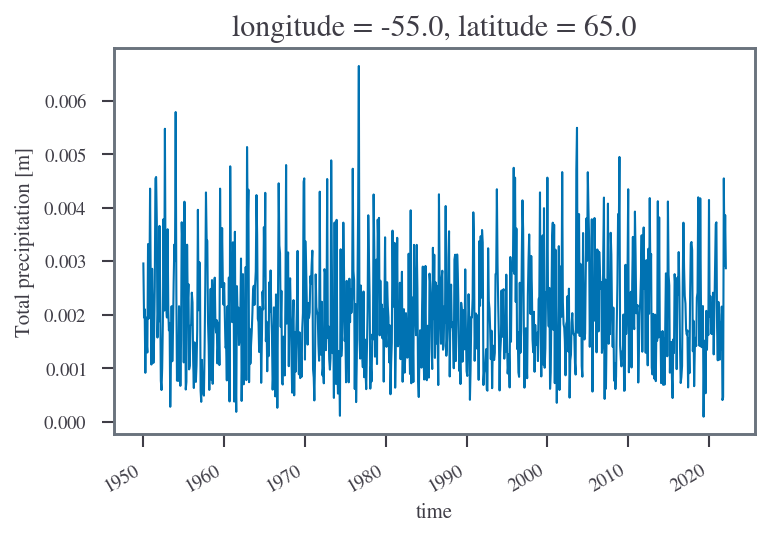

In [6]:
da.isel(latitude=100, longitude=500).plot()

In [13]:
import cartopy
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=180, globe=None))
ax.set_global()
trend.plot(ax=ax)

ModuleNotFoundError: No module named 'cartopy'

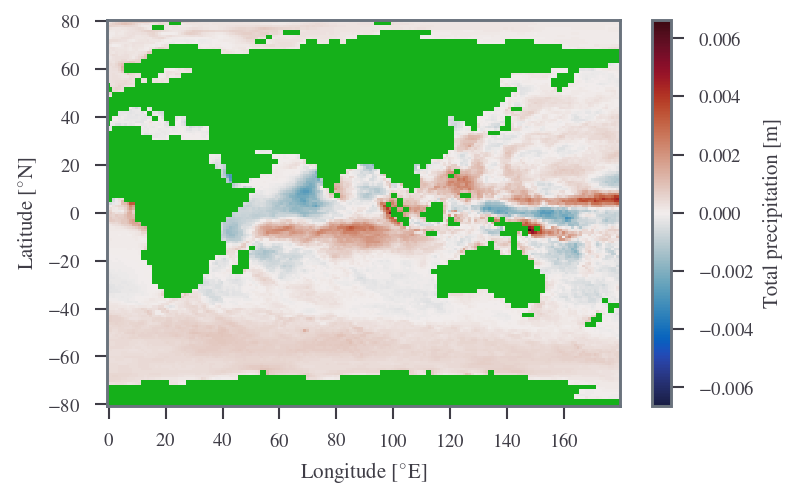

In [19]:
from src.xr_utils import clip
from src.plot_utils import cmap
clip(trend, pac=False).plot(cmap=cmap("delta"))

In [16]:
?clip

In [3]:
xr.open_dataset("/gws/nopw/j04/ai4er/users/sdat2/ecmwf/total_precipitation_era5.nc")

<xarray.Dataset>
Dimensions:    (time: 868, longitude: 81, latitude: 109, expver: 2)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-04-01
  * longitude  (longitude) float32 92.0 92.25 92.5 92.75 ... 111.5 111.8 112.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 8.75 8.5 8.25 8.0
  * expver     (expver) int32 1 5
Data variables:
    tp         (time, latitude, longitude, expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-12 20:03:13 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [6]:
skt = FileNames(variable="skin_temperature")
skt.archive_combined_path

'/gws/nopw/j04/ai4er/users/sdat2/ecmwf/skin_temperature_era5.nc'

In [7]:
ds = xr.open_dataset(skt.archive_combined_path)

In [8]:
ds

<xarray.Dataset>
Dimensions:    (time: 868, longitude: 1440, latitude: 721, expver: 2)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-04-01
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
Data variables:
    skt        (time, latitude, longitude, expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-12 13:14:48 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

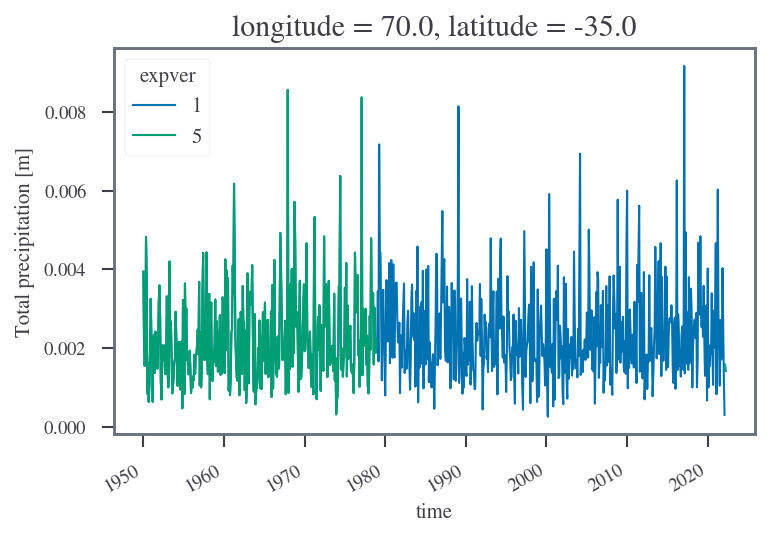

In [11]:
ds.isel(longitude=1000, latitude=500).tp.plot.line(hue="expver")

In [14]:
ds.isel(longitude=1000, latitude=500, time=slice(0,100),expver=1).drop("expver")

<xarray.Dataset>
Dimensions:    (time: 100)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1958-04-01
    longitude  float32 70.0
    latitude   float32 -35.0
Data variables:
    tp         (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-11 22:02:59 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

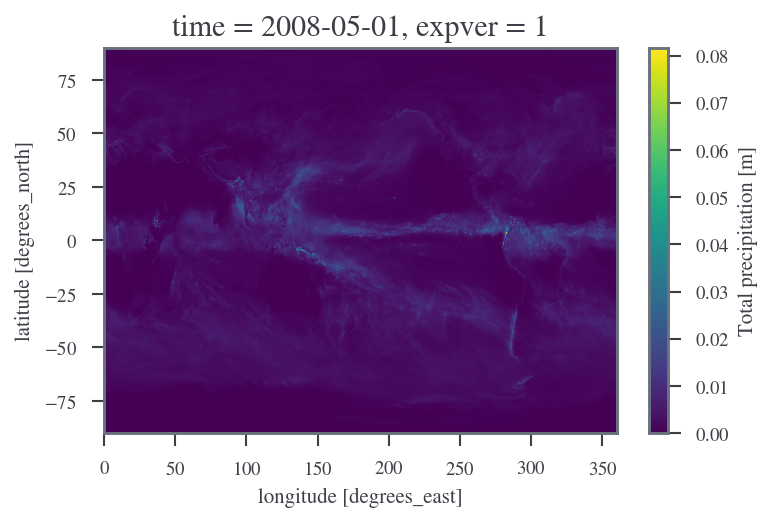

In [7]:
xr.open_dataset(DATA_DIREC / "total_precipitation.nc").isel(time=700, expver=0).tp.plot()

In [4]:
ds

NameError: name 'ds' is not defined